# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1.Load Data
dataset = pd.read_csv("archive/CarPrice_Assignment.csv")

In [3]:
# 2.Check Missing Values
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
def process_and_normalize_data(dataset, columns_to_remove, columns_to_process):
    encoder = LabelEncoder()
    dataset = dataset.drop(columns_to_remove, axis=1)
    dataset[columns] = dataset[columns].apply(encoder.fit_transform)
    print(dataset[columns])
    return dataset

TRAIN_SIZE = int(dataset.shape[0] * 0.5)
TEST_SIZE = int(dataset.shape[0] * 0.3) + TRAIN_SIZE
print(TRAIN_SIZE, TEST_SIZE)

columns_to_remove = ["CarName"]
columns = ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "fuelsystem", "enginetype", "cylindernumber"]

c = ["carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio","horsepower", "peakrpm", "citympg", "highwaympg", "price"]
mean = dataset[c].mean(axis=0)
std = dataset[c].std(axis=0)

dataset = process_and_normalize_data(dataset, columns_to_remove, columns)
dataset['doornumber'] = dataset['doornumber'].map({'two':2,'four':4})
print(dataset.head())
y = dataset.price
x = dataset.drop("price", axis=1)



102 163
     fueltype  aspiration  carbody  drivewheel  enginelocation  fuelsystem  \
0           1           0        0           2               0           5   
1           1           0        0           2               0           5   
2           1           0        2           2               0           5   
3           1           0        3           1               0           5   
4           1           0        3           0               0           5   
..        ...         ...      ...         ...             ...         ...   
200         1           0        3           2               0           5   
201         1           1        3           2               0           5   
202         1           0        3           2               0           5   
203         0           1        3           2               0           3   
204         1           1        3           2               0           5   

     enginetype  cylindernumber  
0             0      

In [5]:
# 3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
y_train,y_test,y_val = y[:TRAIN_SIZE],y[TRAIN_SIZE:TEST_SIZE],y[TEST_SIZE:]
x_train,x_test, x_val = x[:TRAIN_SIZE], x[TRAIN_SIZE:TEST_SIZE],x[TEST_SIZE:]

In [52]:
# 4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_shape=(24,)))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(6, activation="relu"))
    model.add(keras.layers.Dense(1))
#     5.Compilation Step 
    model.compile(optimizer="rmsprop", metrics=["mae"], loss="mse")

    return model

In [53]:
model = build_model()
#  6.Train the Model with Epochs (100) and validate it
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=4, shuffle=True)

Epoch 1/100
26/26 [==============================] - 1s 15ms/step - loss: 288422976.5926 - mae: 14036.6550 - val_loss: 126458880.0000 - val_mae: 10419.5264
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 219772010.0741 - mae: 11060.3333 - val_loss: 75513008.0000 - val_mae: 7626.1606
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 173113486.2222 - mae: 8762.4415 - val_loss: 33806432.0000 - val_mae: 4368.9375
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 99165704.4444 - mae: 6123.5918 - val_loss: 16522502.0000 - val_mae: 3209.1216
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 68325615.2593 - mae: 5900.1207 - val_loss: 15996945.0000 - val_mae: 3389.2495
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 81556754.8148 - mae: 6776.3298 - val_loss: 17085056.0000 - val_mae: 3557.9224
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 98492788.2963

26/26 [==============================] - 0s 6ms/step - loss: 12031970.8970 - mae: 2110.9671 - val_loss: 6268883.5000 - val_mae: 2081.0156
Epoch 56/100
26/26 [==============================] - 0s 4ms/step - loss: 10028186.4086 - mae: 2170.0929 - val_loss: 5971291.5000 - val_mae: 2029.2169
Epoch 57/100
26/26 [==============================] - 0s 5ms/step - loss: 10509408.4815 - mae: 2283.1873 - val_loss: 5282271.0000 - val_mae: 1810.0121
Epoch 58/100
26/26 [==============================] - 0s 4ms/step - loss: 13244667.5556 - mae: 2460.1905 - val_loss: 7088934.0000 - val_mae: 2201.5798
Epoch 59/100
26/26 [==============================] - 0s 5ms/step - loss: 10949506.3194 - mae: 2264.3212 - val_loss: 5261181.5000 - val_mae: 1846.5345
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 9955346.8426 - mae: 2194.9663 - val_loss: 5299657.0000 - val_mae: 1776.5759
Epoch 61/100
26/26 [==============================] - 0s 4ms/step - loss: 10666660.2037 - mae: 2191.5211 - v

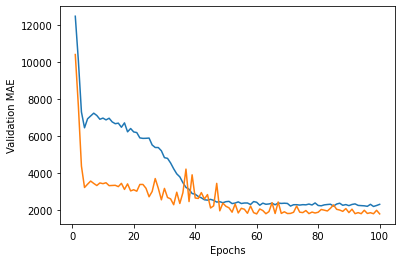

In [54]:
import matplotlib.pyplot as plt

mae = history.history["mae"]
val_mae = history.history["val_mae"]

plt.plot(range(1, len(mae) + 1), mae)
plt.plot(range(1, len(val_mae) + 1), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [55]:
val_mse, val_mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean Squared Error:",val_mse)
print("Mean Absolute Error:", val_mae)

Mean Squared Error: 43719876.0
Mean Absolute Error: 4265.32470703125


In [56]:
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 24))
prediction = model.predict([np.array(data_to_predict)])
print("Predicted Price: ", prediction)
print("actual price", y_test[102])

Predicted Price:  [[24335.664]]
actual price 14399.0
